## HW4 Image Filtering: Difference of Gaussians

The Laplacian of Gaussian (LoG) kernel can be approximated by a scaled Difference of Gaussians (DoG) kernel, cf. [B&B Book 3, Sec 7.1.1]. That is,

\begin{equation}
L_\sigma(x,y) \approx \frac{2k^2}{\sigma^2 (k^2-1)} ~( G_{k\sigma}(x,y) - G_{\sigma}(x,y) ),
\qquad
G_{\sigma} = \frac{1}{2\pi\sigma^2} e^{-(x^2+y^2)/(2\sigma^2)}
\end{equation}

ECE472: Implement an LoG kernel using skimage.filters.gaussian() and skimage.filters.laplace(). Apply to F35.gif for sigma=1.0. Repeat for the DoG kernel skimage.filters.difference_of_gaussians(). Determine determine sigma values for the Dog kernel that approximate the appearance of LoG filtering.

ECE572: Complete the ECE472 assignment only implement your own DoG kernel using the above formulae.

In [247]:
%matplotlib inline
import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io 
from skimage import exposure
from skimage import filters as flt
from skimage.util import img_as_float32 as img_as_float
import skimage

from scipy import signal
from scipy.ndimage import convolve


# Load packages needed inline

In [248]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print("Data Range: ", np.min(I), "to", np.max(I))
    
    # Copy from HW3

In [249]:
def show_imghist(I1,I2, I3, I4, vmin=0.0, vmax=1.0):
    fig, ax = plt.subplots(4,2, figsize=(15,10))

    fig.subplots_adjust(hspace=0.5, wspace=0.0)

    ax[0,0].imshow(I1, cmap='gray', vmin=vmin, vmax=vmax)
    ax[0,0].set_axis_off()
    ax[0,0].set_title("Original Image")

    ax[0,1].hist(I1.ravel(), lw=0, bins=256)
    ax[0,1].set_xlim(0.0,1.0)
    ax[0,1].set_yticks([])
    ax[0,1].set_title("Original Image - Histogram")
    

    ax[1,0].imshow(I2, cmap='gray', vmin=0.00024572542, vmax=0.9739011)
    ax[1,0].set_axis_off()
    ax[1,0].set_title("Gaussian Filter")
    

    ax[1,1].hist(I2.ravel(), lw=0, bins=256)
    ax[1,1].set_xlim(0.0,1.0)
    ax[1,1].set_yticks([])
    ax[1,1].set_title("Gaussian Filter - Histogram")
    

    ax[2,0].imshow(I3, cmap='gray', vmin=-1.5607843, vmax=1.592157)
    ax[2,0].set_axis_off()
    ax[2,0].set_title("Laplace Filter")
    
    
    ax[2,1].hist(I3.ravel(), lw=0, bins=256)
    ax[2,1].set_xlim(-0.25,0.25)
    ax[2,1].set_yticks([])
    ax[2,1].set_title("Laplace Filter - Histogram")

    ax[3,0].imshow(I4, cmap='gray', vmin=-0.45179048, vmax=0.5144459)
    ax[3,0].set_axis_off()
    ax[3,0].set_title("Difference of Gaussian")

    ax[3,1].hist(I4.ravel(), lw=0, bins=256)
    ax[3,1].set_xlim(-0.25,0.25)
    ax[3,1].set_yticks([])
    ax[3,1].set_title("Difference of Gaussian - Histogram")

def show_imghist2(I5, I6):
    pass
   

    

    # Copy from HW3

In [250]:
# Read F35.gif image, convert to float32
I1 = io.imread("./F35.gif", as_gray = True)
I1 = img_as_float(I1)
# Run print_imginfo() and show_imghist()
print("I1")
print_imginfo(I1)

I1
<class 'numpy.ndarray'>
(460, 788) float32
Data Range:  0.0 to 1.0


## ECE472 Students: SKImage DoG Kernel

I2
<class 'numpy.ndarray'>
(460, 788) float32
Data Range:  0.00024572542 to 0.9739011

I3
<class 'numpy.ndarray'>
(460, 788) float32
Data Range:  -0.3339176 to 0.36693633

I4
<class 'numpy.ndarray'>
(460, 788) float32
Data Range:  -0.45179048 to 0.5144459

Images and Histograms for 472 requirements


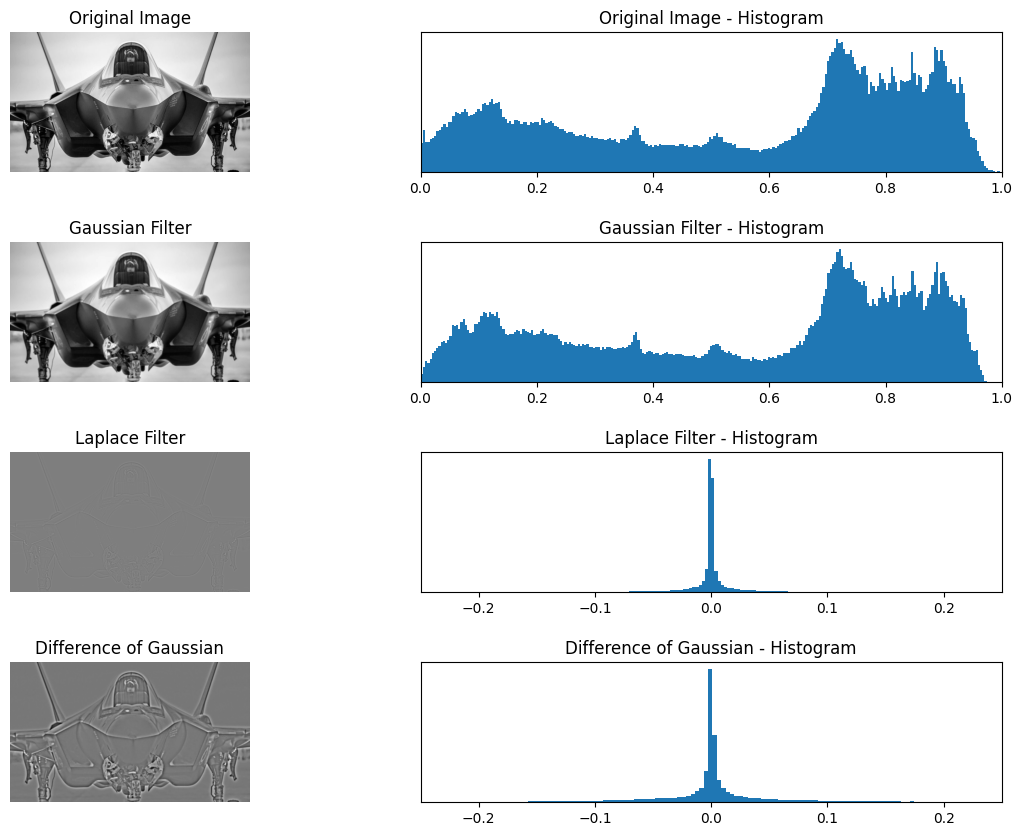

In [251]:
# Apply LoG filter using skimage.filters.gaussian() and skimage.filters.laplace()
I2 = skimage.filters.gaussian(I1, sigma=1) #applies gaussian filter to the F35 image
I3 = skimage.filters.laplace(I2, ksize=5 ,mask=None) #applies laplacian filter to the F35 image

print("I2")
print_imginfo(I2)
print("")
print("I3")
print_imginfo(I3)
print("")
print("I4")

# Apply DoG filter using skimage.filters.difference_of_gaussians()
I4 = skimage.filters.difference_of_gaussians(I1,low_sigma = 1, high_sigma=5)
print_imginfo(I4)
print("")
# Show images and histograms using appropriate vmin, vmax ranges
print("Images and Histograms for 472 requirements")
show_imghist(I1,I2,I3,I4)

# EXTRA: For fun, try larger sigma values. Can you make interesting observations?

## ECE572 Students:  Homebrew DoG Kernel

In [252]:
# Apply LoG filter using skimage.filters.gaussian() and skimage.filters.laplace()
I5 = skimage.filters.gaussian(I1, sigma=1)
I6 = skimage.filters.laplace(I2, ksize=5 ,mask=None)
# Implement and apply DoG filter based on above equations


# Show images and histograms using appropriate vmin, vmax ranges

# EXTRA: For fun, try larger sigma values. Can you make interesting observations?

In [3]:
import numpy as np

def Gauss_function(x,y,mu,sigma):
    denominator = 1/(np.sqrt(2*np.pi)*sigma)
    exponent_denominator = 2*sigma**2
    G1 = denominator*np.exp((-1*(x-mu)**2)/exponent_denominator)
    G2 = denominator*np.exp((-1*(y-mu)**2)/exponent_denominator)
    G3 = G1*G2
    return G1, G2,G3

print(Gauss_function(4,3,0,1)[0])
print(Gauss_function(4,3,0,1)[1])
print(Gauss_function(4,3,0,1)[2])


0.00013383022576488537
0.0044318484119380075
5.931152735254122e-07
